In [13]:
# load the modules

import numpy as np
import pandas as pd
import seaborn as sb
sb.set_style("dark")
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Data preparation

In [14]:
# We use this function in order to evaulate a classifier. It trains on a fraction of the data corresponding to 
# split_ratio, and evaulates on the rest of the data

def evaluate_classifier(clf, data, target, split_ratio=0.2):
    trainX, testX, trainY, testY = train_test_split(data, target, train_size=split_ratio, random_state=0)
    clf.fit(trainX, trainY)
    return clf.score(testX,testY)

In [45]:
# read in the data

train = pd.read_csv('C:/Users/tianjiayang/digit recognition with Statistical learning and Deep Learning/Digit_recon/train.csv')
test  = pd.read_csv('C:/Users/tianjiayang/digit recognition with Statistical learning and Deep Learning/Digit_recon/test.csv')
target = train["label"]
train = train.drop("label",1)
print(train.shape)
print(target.shape)

(42000, 784)
(42000,)


C:\Users\tianjiayang\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


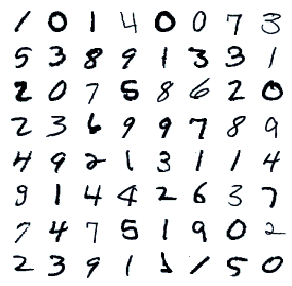

In [17]:
# plot some of the numbers

figure(figsize(5,5))
for digit_num in range(0,64):
    subplot(8,8,digit_num+1)
    grid_data = train.iloc[digit_num].as_matrix().reshape(28,28)  # reshape from 1d to 2d pixel array
    plt.imshow(grid_data, interpolation = "none", cmap = "bone_r")
    xticks([])
    yticks([])


# Use Random forest to see if their any particular features(pixels) we need to care about

In [23]:
# check performance of random forest classifier, as function of number of estimators 
# here we only take 10000 data points to train

n_estimators_array = np.array([1,5,10,50,100,200,500])
n_samples = 10
n_grid = len(n_estimators_array)
score_array_mu =np.zeros(n_grid)
score_array_sigma = np.zeros(n_grid)
j=0
for n_estimators in n_estimators_array:
    score_array=np.zeros(n_samples)
    for i in range(0,n_samples):
        clf = RandomForestClassifier(n_estimators = n_estimators, n_jobs=1, criterion="gini")
        score_array[i] = evaluate_classifier(clf, train.iloc[0:10000], target.iloc[0:10000], 0.8)
    score_array_mu[j], score_array_sigma[j] = mean(score_array), std(score_array)
    j=j+1

C:\Users\tianjiayang\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\tianjiayang\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\tianjiayang\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\tianjiayang\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\tianjiayang\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement 

C:\Users\tianjiayang\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\tianjiayang\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\tianjiayang\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\tianjiayang\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\tianjiayang\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement 

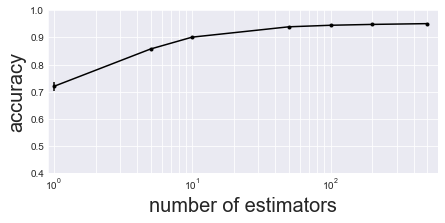

In [24]:
# it looks like the performace saturates around 50-100 estimators

figure(figsize(7,3))
errorbar(n_estimators_array, score_array_mu, yerr=score_array_sigma, fmt='k.-')
xscale("log")
xlabel("number of estimators",size = 20)
ylabel("accuracy",size = 20)
xlim(0.9,600)
ylim(0.4,1)
grid(which="both")

Feature ranking:
1. feature 378 (0.009114)
2. feature 409 (0.008434)
3. feature 433 (0.007951)
4. feature 377 (0.007681)
5. feature 461 (0.007668)
6. feature 350 (0.007406)
7. feature 406 (0.007008)
8. feature 405 (0.006960)
9. feature 437 (0.006604)
10. feature 346 (0.006470)
11. feature 318 (0.006419)
12. feature 434 (0.006270)
13. feature 211 (0.006187)
14. feature 462 (0.006087)
15. feature 154 (0.006001)
16. feature 347 (0.005924)
17. feature 568 (0.005903)
18. feature 542 (0.005860)
19. feature 375 (0.005851)
20. feature 263 (0.005757)


Text(0,0.5,'importance')

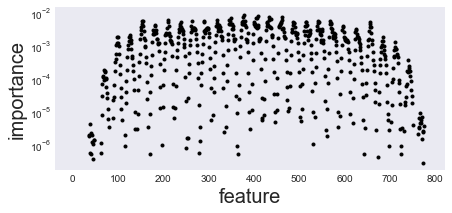

In [27]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(0,20):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances

figure(figsize(7,3))
plot(indices[:],importances[indices[:]],'k.')
yscale("log")
xlabel("feature",size=20)
ylabel("importance",size=20)

# It looks like there are no significantly important features (i.e., pixels) in the original data. Next, let us try to decompose the data using a principal component analysis (PCA):

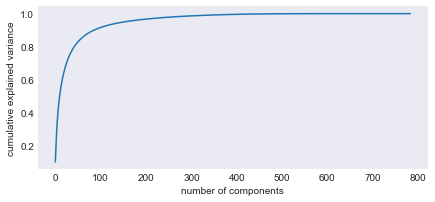

In [28]:
#check how many components should we keep to capture most of the inforamtion:
pca = PCA().fit(train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

# looks like we can capture 95% of data by setting components = 200;Maybe the more important question is: How good is our prediction as a function of number of components? Let's look at this next. 

In [29]:
clf = KNeighborsClassifier()
n_components_array=([1,2,3,4,5,10,20,50,100,150,200,500])
score_array = np.zeros(len(n_components_array))
i=0

for n_components in n_components_array:
    pca = PCA(n_components=n_components)
    pca.fit(train)
    transform = pca.transform(train.iloc[0:10000])
    score_array[i] = evaluate_classifier(clf, transform, target.iloc[0:10000], 0.8)
    i=i+1

C:\Users\tianjiayang\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


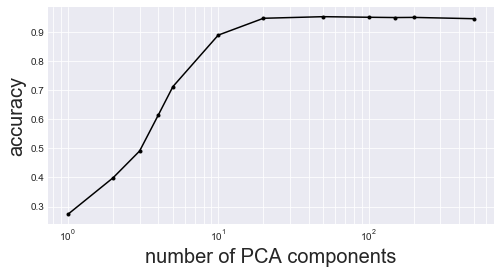

In [30]:
figure(figsize(8,4))
plot(n_components_array,score_array,'k.-')
xscale('log')
xlabel("number of PCA components", size=20)
ylabel("accuracy", size=20)
grid(which="both")

It seems 20 or 50 is the best choices, and the accuracy may go down as more components ,maybe due to overfitting.

# Now, let's do the PCA + KNN clf， and using the whold dataset。

In [31]:
# PCA + kNN
    
pca = PCA(n_components=50)
pca.fit(train)
transform_train = pca.transform(train)
transform_test = pca.transform(test)

clf = KNeighborsClassifier()
clf.fit(transform_train, target)
results=clf.predict(transform_test)



In [38]:
np.savetxt('results.csv', 
           np.c_[range(1,len(test)+1),results], 
           delimiter=',', 
           header = 'ImageId,Label', 
           comments = '', 
           fmt='%d')

#kaggle score(accuracy) : 0.97314